# kaggle Cervical cancer dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

In [82]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [83]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [85]:
def count_na(col):
    count = 0
    for s in col:
        if s == "?":
            count +=1
    return count        

In [86]:
df.columns

Index([u'Age', u'Number of sexual partners', u'First sexual intercourse',
       u'Num of pregnancies', u'Smokes', u'Smokes (years)',
       u'Smokes (packs/year)', u'Hormonal Contraceptives',
       u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
       u'STDs (number)', u'STDs:condylomatosis',
       u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
       u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
       u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
       u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
       u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
       u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
       u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
       u'Citology', u'Biopsy'],
      dtype='object')

In [87]:
count_df = df.apply(count_na, axis =0)

In [88]:
(count_df.values)*1.0/df.shape[0]

array([ 0.        ,  0.03030303,  0.00815851,  0.06526807,  0.01515152,
        0.01515152,  0.01515152,  0.12587413,  0.12587413,  0.13636364,
        0.13636364,  0.12237762,  0.12237762,  0.12237762,  0.12237762,
        0.12237762,  0.12237762,  0.12237762,  0.12237762,  0.12237762,
        0.12237762,  0.12237762,  0.12237762,  0.12237762,  0.12237762,
        0.        ,  0.91724942,  0.91724942,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [89]:
na_percentage_df = pd.DataFrame(1-(count_df.values)*1.0/df.shape[0], 
                                columns = ['percentage'],
                               index = list(df.columns))

In [90]:
na_percentage_df

,percentage
Age,1.000000
Number of sexual partners,0.969697
First sexual intercourse,0.991841
Num of pregnancies,0.934732
Smokes,0.984848
Smokes (years),0.984848
Smokes (packs/year),0.984848
Hormonal Contraceptives,0.874126
Hormonal Contraceptives (years),0.874126
IUD,0.863636


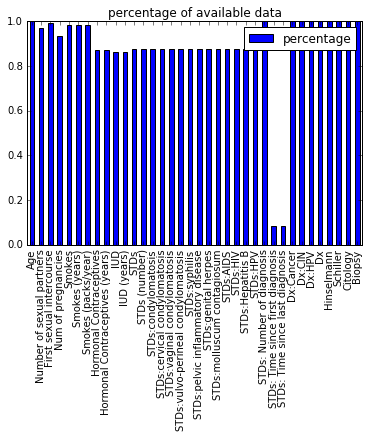

In [91]:
na_percentage_df.plot.bar()
plt.title("percentage of available data")
plt.show()

## replace ? with NAN

In [92]:
def changetoNA(col):
    df[col] = df[col].apply(lambda x: np.NaN if x == "?" else x)    

In [93]:
for col in list(df.columns):
    changetoNA(col)     

In [94]:
df.columns

Index([u'Age', u'Number of sexual partners', u'First sexual intercourse',
       u'Num of pregnancies', u'Smokes', u'Smokes (years)',
       u'Smokes (packs/year)', u'Hormonal Contraceptives',
       u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
       u'STDs (number)', u'STDs:condylomatosis',
       u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
       u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
       u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
       u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
       u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
       u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
       u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
       u'Citology', u'Biopsy'],
      dtype='object')

## make a final clas from the last four columns

In [95]:
def make_class(x):
    a = x['Hinselmann'] +  x['Schiller'] + x['Citology'] + x['Biopsy']
    if a >0:
        x['class'] = 1
    else:
        x['class'] = 0
    return x['class']

In [96]:
df['class'] = df.apply(make_class, axis = 1)
df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis =1, inplace = True)

In [97]:
sum(df['class'])

102

In [98]:
df.shape[0]

858

In [99]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,class
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.118881
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.323837
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
for i in range(df.shape[1]):
    print (list(df.columns)[i], type(df.ix[0][i]))

('Age', <type 'numpy.int64'>)
('Number of sexual partners', <type 'str'>)
('First sexual intercourse', <type 'str'>)
('Num of pregnancies', <type 'str'>)
('Smokes', <type 'str'>)
('Smokes (years)', <type 'str'>)
('Smokes (packs/year)', <type 'str'>)
('Hormonal Contraceptives', <type 'str'>)
('Hormonal Contraceptives (years)', <type 'str'>)
('IUD', <type 'str'>)
('IUD (years)', <type 'str'>)
('STDs', <type 'str'>)
('STDs (number)', <type 'str'>)
('STDs:condylomatosis', <type 'str'>)
('STDs:cervical condylomatosis', <type 'str'>)
('STDs:vaginal condylomatosis', <type 'str'>)
('STDs:vulvo-perineal condylomatosis', <type 'str'>)
('STDs:syphilis', <type 'str'>)
('STDs:pelvic inflammatory disease', <type 'str'>)
('STDs:genital herpes', <type 'str'>)
('STDs:molluscum contagiosum', <type 'str'>)
('STDs:AIDS', <type 'str'>)
('STDs:HIV', <type 'str'>)
('STDs:Hepatitis B', <type 'str'>)
('STDs:HPV', <type 'str'>)
('STDs: Number of diagnosis', <type 'numpy.int64'>)
('STDs: Time since first diagnos

# change all columns to numberic type

In [101]:
df = df.apply(pd.to_numeric)

In [102]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,class
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.118881
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.323837
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# scale

In [103]:
from sklearn.preprocessing import MinMaxScaler
df.fillna(0, inplace = True)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df= scaler.fit_transform(df)

In [104]:
df.shape


(858, 33)

In [105]:
y = df[:, -1]

In [106]:
X = df[:, range(df.shape[1]-1)]

#train validation split

In [107]:
from sklearn.cross_validation import train_test_split

def trainTestSplit(X):
    # Split the 'features' and 'income' data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42)
    # Show the results of the split
    print X_train.shape
    print "Training set has {} samples.".format(X_train.shape[0])
    print "Testing set has {} samples.".format(X_test.shape[0])
    return X_train, X_test, y_train, y_test

In [108]:
X_train, X_test, y_train, y_test=trainTestSplit(X)

(686, 32)
Training set has 686 samples.
Testing set has 172 samples.


# naive predictor

In [109]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. 
Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(y) # Counting the ones as this is the naive case. 
FP = len(y) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case


accuracy = TP*1.0/len(y)
recall = TP*1.0 /(TP+FN)
precision = TP*1.0/len(y)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as 
#(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.1189, F-score: 0.1443]


In [110]:
import visuals as vs
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.utils import resample
from sklearn.metrics import make_scorer

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    
    #slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
  
    X_train, y_train = X_train[:sample_size], y_train[:sample_size]
    
    learner = learner.fit(X_train, y_train)
    
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) 
    #using .predict()
    start = time() # Get start time

    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)[:300]
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='micro', beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average='micro', beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

686
68
6
DecisionTreeClassifier trained on 6 samples.
DecisionTreeClassifier trained on 68 samples.
DecisionTreeClassifier trained on 686 samples.
LogisticRegression trained on 6 samples.
LogisticRegression trained on 68 samples.
LogisticRegression trained on 686 samples.
RandomForestClassifier trained on 6 samples.
RandomForestClassifier trained on 68 samples.
RandomForestClassifier trained on 686 samples.


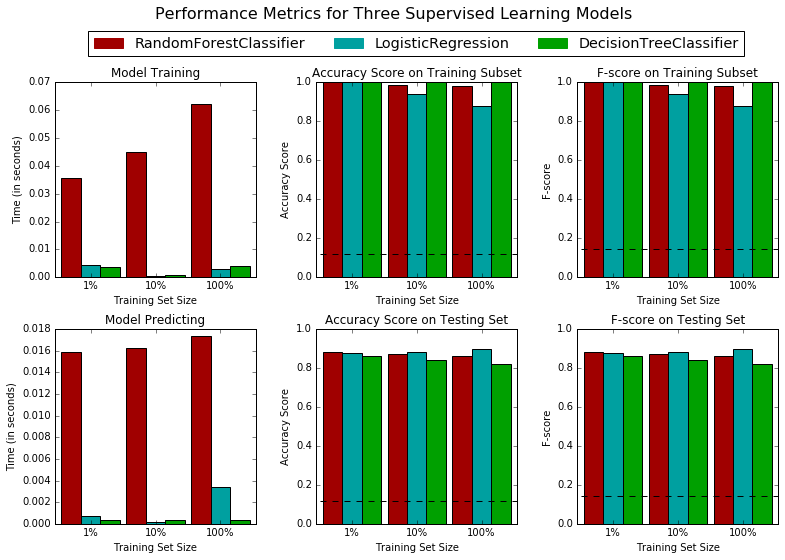

In [111]:
from sklearn import tree
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
import pprint
from time import time


clf_A = tree.DecisionTreeClassifier()
clf_B = LogisticRegression()
clf_C = RandomForestClassifier()
#clf_C = ExtraTreesClassifier()


samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

print samples_100
print samples_10
print samples_1
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__

    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
# pprint.pprint(results)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

# optimize model

In [112]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cross_validation import ShuffleSplit

# Initialize the classifier
clf = RandomForestClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,
                     scoring=scorer, cv=cv_sets)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

IndexError: index 852 is out of bounds for size 686